Импорт библиотек

In [1]:
import pandas as pd 
import numpy as np 
from sklearn import preprocessing

Вывод общей информации о датасете

In [2]:
df = pd.read_csv('lab1.csv',encoding='cp1251')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               198 non-null    int64
 1   age              198 non-null    int64
 2   income           198 non-null    int64
 3   spending_rating  198 non-null    int64
dtypes: int64(4)
memory usage: 6.3 KB


Произведение нормализации столбца spending_rating с использованием L2-нормализации

In [3]:
array = np.array(df['spending_rating']) 
normal_arr = preprocessing.normalize([array]) 
print(normal_arr)

[[0.04949545 0.10279825 0.00761469 0.0977218  0.05076457 0.09645268
  0.00761469 0.11929674 0.00380734 0.09137622 0.0177676  0.12564231
  0.01903671 0.0977218  0.01649848 0.10026002 0.044419   0.08376154
  0.03680431 0.044419   0.09264534 0.00634557 0.09264534 0.0177676
  0.10406737 0.04061166 0.07741597 0.03934254 0.11041294 0.00507646
  0.09264534 0.00507646 0.11675851 0.0177676  0.10279825 0.02157494
  0.09264534 0.03299697 0.09518357 0.044419   0.11675851 0.04568811
  0.07741597 0.0355352  0.08249242 0.06980128 0.05964837 0.0533028
  0.0533028  0.06599394 0.07614685 0.06853217 0.07614685 0.05711014
  0.05203368 0.06345571 0.05837925 0.06472483 0.05837925 0.0710704
  0.06980128 0.06599394 0.07487774 0.06472483 0.07487774 0.06345571
  0.06091748 0.07487774 0.05964837 0.06980128 0.0533028  0.0621866
  0.0710704  0.05964837 0.06853217 0.06726305 0.06091748 0.06599394
  0.0533028  0.06472483 0.06980128 0.05203368 0.05584103 0.07233951
  0.05837925 0.07360862 0.06980128 0.07614685 0.0583

Проверка правильности проведения нормализации отдельного столбца

In [4]:
print(sum([x**2 for x in normal_arr[0]]))

0.9999999999999997


Стандартизация данных по столбцам и по строкам

In [5]:
normal1 = preprocessing.normalize(df, axis=0)
print(normal1)

[[0.00061454 0.03280067 0.01614617 0.04949545]
 [0.00122908 0.03625337 0.01614617 0.10279825]
 [0.00184362 0.03452702 0.01722258 0.00761469]
 [0.00245816 0.03970608 0.01722258 0.0977218 ]
 [0.0030727  0.05351689 0.01829899 0.05076457]
 [0.00368724 0.05524324 0.01829899 0.09645268]
 [0.00430178 0.06042229 0.06781391 0.00761469]
 [0.00491632 0.06905405 0.0193754  0.11929674]
 [0.00553086 0.11048648 0.02045181 0.00380734]
 [0.00614541 0.04315878 0.02045181 0.09137622]
 [0.00675995 0.11566553 0.02045181 0.0177676 ]
 [0.00737449 0.06042229 0.02045181 0.12564231]
 [0.00798903 0.06042229 0.02152823 0.01903671]
 [0.00860357 0.04143243 0.02152823 0.0977218 ]
 [0.00921811 0.06905405 0.02152823 0.01649848]
 [0.00983265 0.03797973 0.06781391 0.10026002]
 [0.01044719 0.06042229 0.02260464 0.044419  ]
 [0.01106173 0.03797973 0.02260464 0.08376154]
 [0.01167627 0.03797973 0.02475746 0.03680431]
 [0.01290535 0.06042229 0.02583387 0.044419  ]
 [0.01351989 0.04315878 0.02583387 0.09264534]
 [0.01413443 

In [6]:
normal2 = preprocessing.normalize(df, axis=1)
print(normal2)

[[0.02178034 0.4138265  0.32670513 0.84943334]
 [0.02351965 0.2469563  0.17639736 0.95254574]
 [0.11330844 0.75538957 0.60431166 0.22661687]
 [0.04875874 0.28036275 0.19503495 0.93860571]
 [0.09325048 0.57815298 0.31705163 0.74600385]
 [0.07108187 0.37910328 0.20139862 0.90037029]
 [0.09634345 0.48171727 0.86709108 0.0825801 ]
 [0.07689464 0.38447322 0.17301295 0.90351208]
 [0.13346888 0.94911207 0.28176765 0.04448963]
 [0.12628921 0.31572301 0.23994949 0.90928228]
 [0.1530289  0.93208511 0.26432264 0.19476405]
 [0.11175006 0.32593767 0.17693759 0.92193798]
 [0.28931783 0.77893261 0.44510435 0.33382826]
 [0.16613773 0.28480754 0.23733962 0.91375753]
 [0.30656967 0.81751912 0.40875956 0.26569371]
 [0.15290191 0.21024013 0.60205129 0.7549532 ]
 [0.30146393 0.62066104 0.37239662 0.62066104]
 [0.24042781 0.29385621 0.28049911 0.88156863]
 [0.40370742 0.4674507  0.48869846 0.61618502]
 [0.35665012 0.59441687 0.40760014 0.59441687]
 [0.26268774 0.29850879 0.28656844 0.87164567]
 [0.40068227 

Приведение данных к диапазону (0, 3) с использованием MinMaxScaler

In [7]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,3)) 
names = df.columns 
d = scaler.fit_transform(df) 
scaled_df = pd.DataFrame(d, columns=names) 
print(scaled_df.head(5))

         id       age   income  spending_rating
0  0.000000  0.057692  0.00000         1.163265
1  0.015075  0.173077  0.00000         2.448980
2  0.030151  0.115385  0.02459         0.153061
3  0.045226  0.288462  0.02459         2.326531
4  0.060302  0.750000  0.04918         1.193878


Приведение данных к диапазону (-1, 1) с использованием MaxAbsScaler

In [8]:
scaler = preprocessing.MaxAbsScaler() 
names = df.columns 
d = scaler.fit_transform(df) 
scaled_df = pd.DataFrame(d, columns=names) 
print(scaled_df.head(5))

      id       age    income  spending_rating
0  0.005  0.271429  0.109489         0.393939
1  0.010  0.300000  0.109489         0.818182
2  0.015  0.285714  0.116788         0.060606
3  0.020  0.328571  0.116788         0.777778
4  0.025  0.442857  0.124088         0.404040


Приведение данных к диапазону (25, 75) с использованием RobustScaler

In [9]:
scaler = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
names = df.columns 
d = scaler.fit_transform(df) 
scaled_df = pd.DataFrame(d, columns=names) 
print(scaled_df.head(5))

         id       age    income  spending_rating
0 -1.010152 -0.829268 -1.342857        -0.291391
1 -1.000000 -0.731707 -1.342857         0.821192
2 -0.989848 -0.780488 -1.314286        -1.165563
3 -0.979695 -0.634146 -1.314286         0.715232
4 -0.969543 -0.243902 -1.285714        -0.264901


Равномерное распределение с использованием QuantileTransformer

c:\Users\slava\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (198). n_quantiles is set to n_samples.
  warnings.warn(


         id       age    income  spending_rating
0  0.000000  0.038071  0.000000         0.294416
1  0.005076  0.091371  0.000000         0.862944
2  0.010152  0.068528  0.012690         0.048223
3  0.015228  0.137056  0.012690         0.837563
4  0.020305  0.327411  0.022843         0.309645


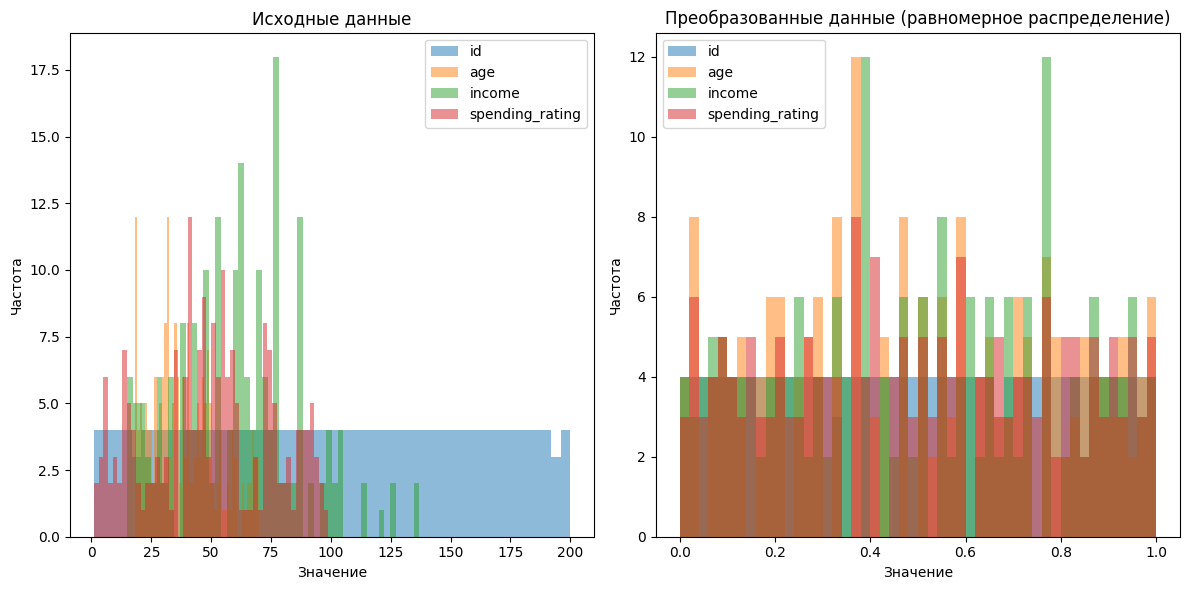

In [10]:
from matplotlib import pyplot as plt

quantile_transformer = preprocessing.QuantileTransformer()
names = df.columns 
d = quantile_transformer.fit_transform(df) 
scaled_df = pd.DataFrame(d, columns=names) 
print(scaled_df.head(5))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for column in df.columns:
    plt.hist(df[column], bins=50, alpha=0.5, label=column)
plt.title('Исходные данные')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()

plt.subplot(1, 2, 2)
for column in scaled_df.columns:
    plt.hist(scaled_df[column], bins=50, alpha=0.5, label=column)
plt.title('Преобразованные данные (равномерное распределение)')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()

plt.tight_layout()
plt.show()

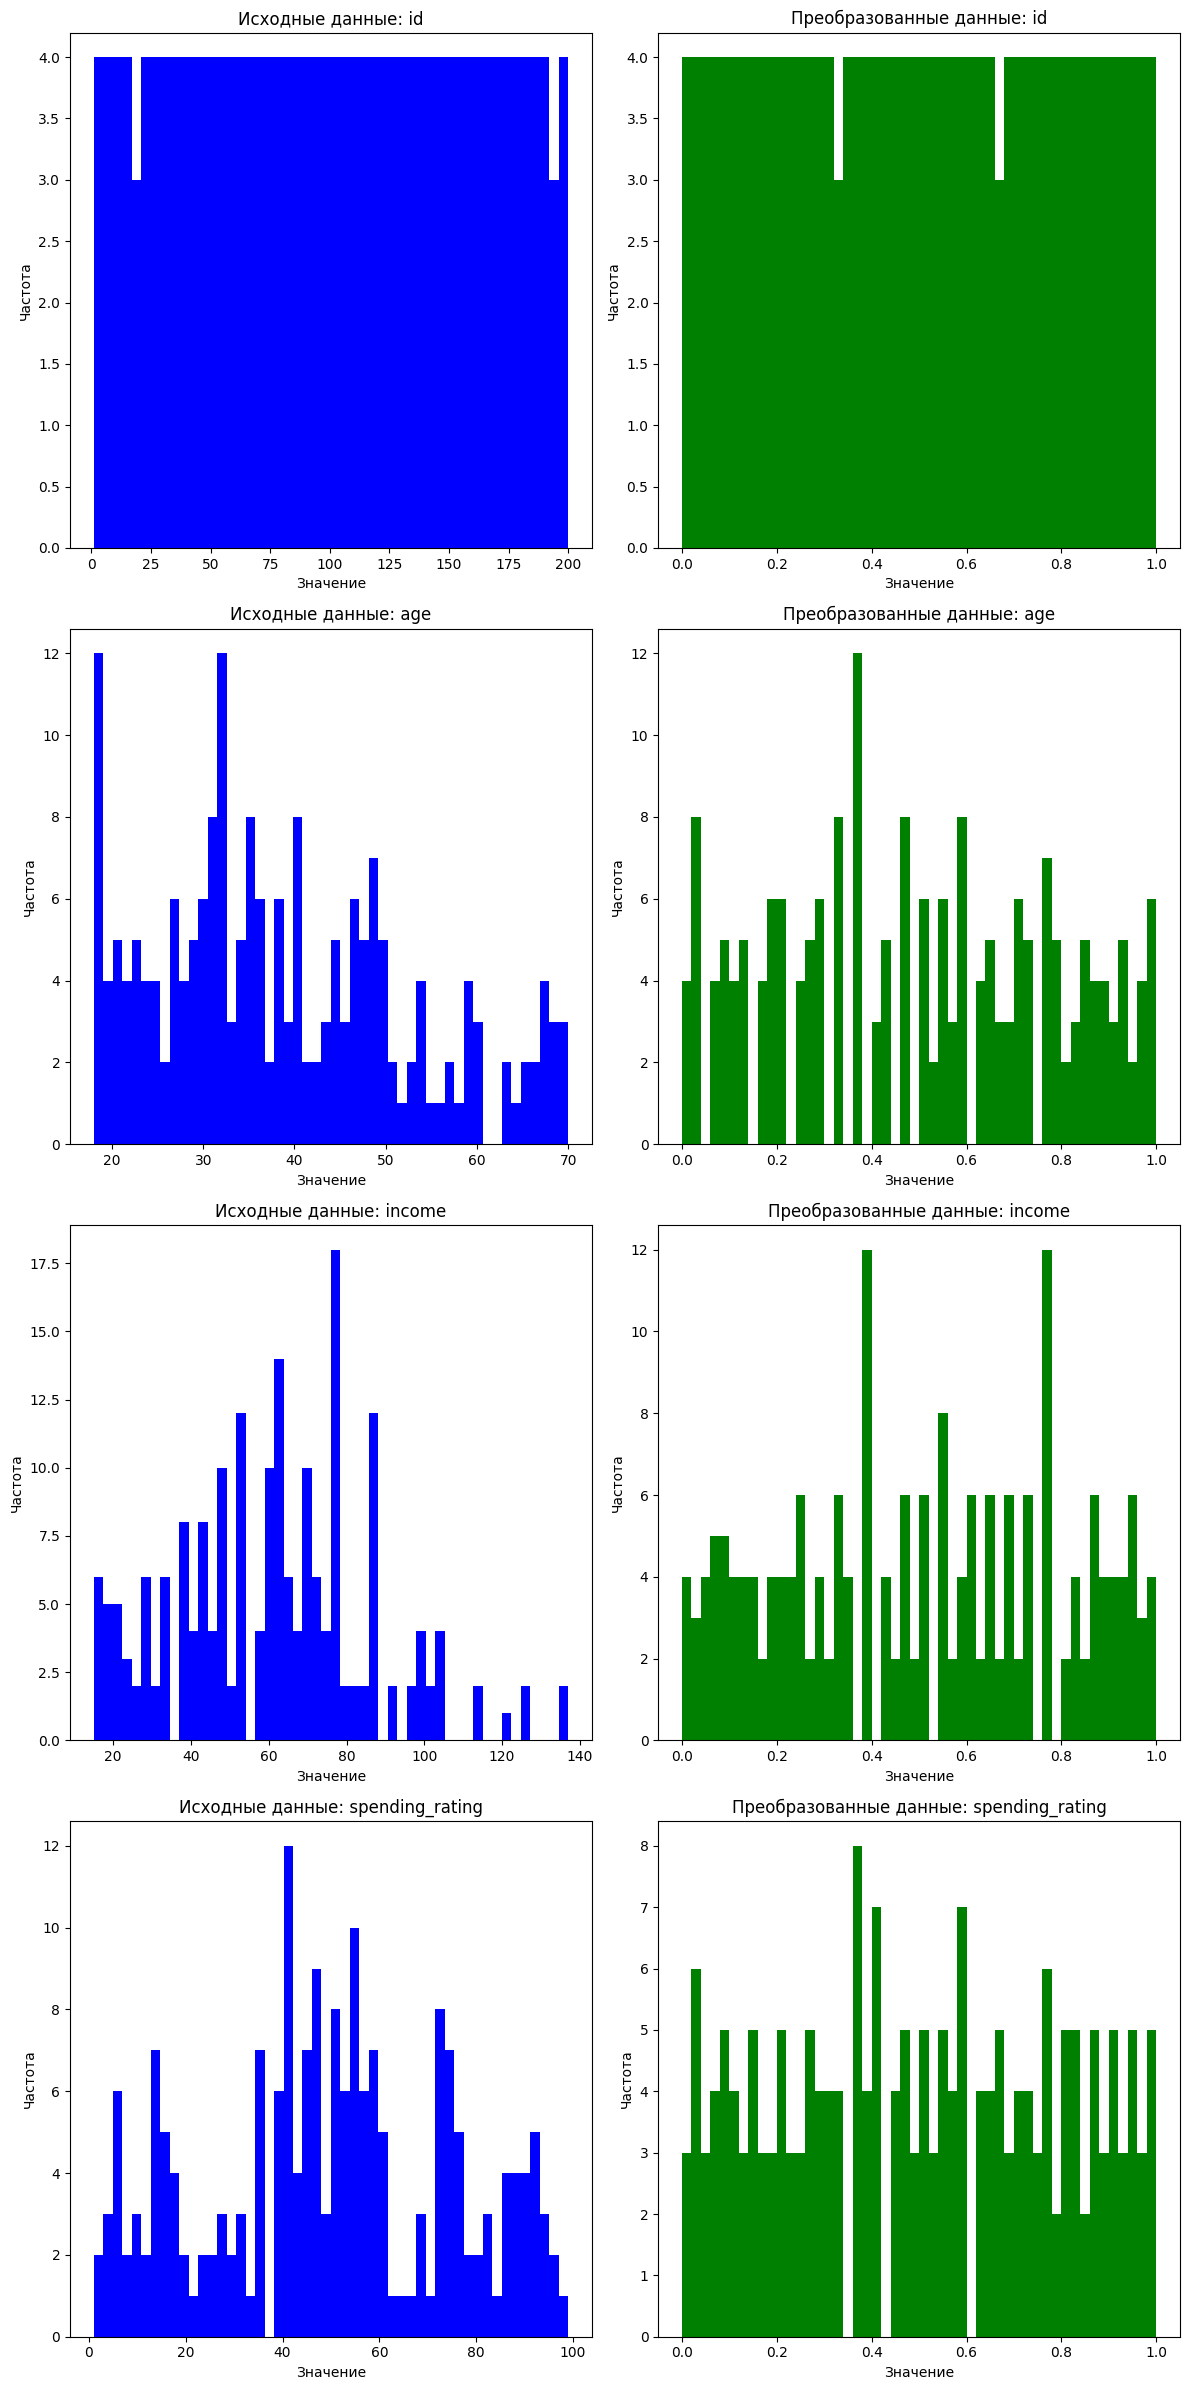

In [11]:
fig, axes = plt.subplots(nrows=len(df.columns), ncols=2, figsize=(12, 6 * len(df.columns)))
for i, column in enumerate(df.columns):
    axes[i, 0].hist(df[column], bins=50, color='blue')
    axes[i, 0].set_title(f'Исходные данные: {column}')
    axes[i, 0].set_xlabel('Значение')
    axes[i, 0].set_ylabel('Частота')

    axes[i, 1].hist(scaled_df[column], bins=50, color='green')
    axes[i, 1].set_title(f'Преобразованные данные: {column}')
    axes[i, 1].set_xlabel('Значение')
    axes[i, 1].set_ylabel('Частота')

plt.tight_layout()
plt.show()